# Polynomial Regression 多項式回歸

線性回歸我們可以看出回歸模型就是一條線，但很多時候我們的資料分布不一定是線性的，這時候我們的分布公式會變成:

### $$ \hat{y} = \theta_0 +\theta_1 * X + \theta_2 * X^2 ... \theta+n * X^n $$

你會發現公式本身與線性回歸公式如出一轍，唯一的差異就在冪次。因此我們可以對資料做一點處理加入新的冪次特徵使得:

### $$ A = [x, x^2, x^3 ... x^n] $$
### $$ \hat{y} = \theta \cdot A^T$$

* 透過幫資料增加N階冪次特徵，我們可以控制多項式回歸的擬合能力
* 注意 若 x = [a, b] 

> 2階冪次特徵 = $ a^2, ab, b^2$

> 3階冪次特徵 = 2階冪次特徵 + $ a^3, a^2b, ab^2, b^3$

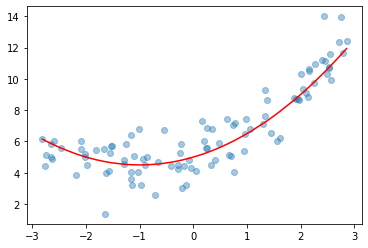

In [1]:
# 當x的特徵數量 > 1時， theta是一種複合的3D矩陣，不利於理解
# 故我們以 x的feature num = 1作為展示，該證明可推廣至 feature num = n


import numpy as np
import matplotlib.pyplot as plt




X = np.random.rand(100)*6-3
X = np.sort(X)
y = 0.5*(X**2) + X+5
noise =  np.random.randn(100)

plt.scatter(x = X, y = y+noise, alpha=0.4)
plt.plot(X, y, color = 'r')
plt.show()

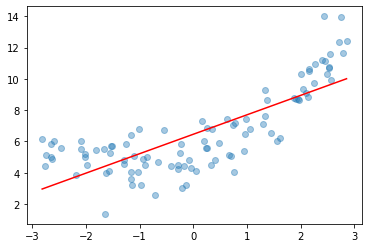

In [2]:
# 直接線性回歸測試

from sklearn.linear_model import LinearRegression

# 資料處理
train_x = X.reshape(-1, 1)
train_y = y+noise


# model
net = LinearRegression()
net.fit(train_x, train_y)

yhat = net.predict(train_x)


plt.scatter(x = X, y = y+noise, alpha=0.4)
plt.plot(X, yhat.reshape(-1), color = 'r')
plt.show()

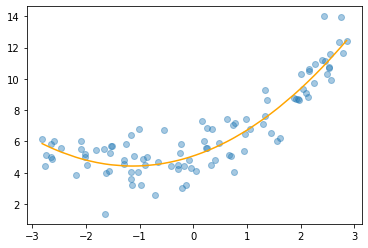

In [3]:
# 對資料做冪次特徵擴充後


from sklearn.preprocessing import PolynomialFeatures

transformer = PolynomialFeatures(degree = 2, include_bias=False) # 資料轉換器 轉換後會自動添加冪次特徵
train_x = transformer.fit_transform(X.reshape(-1, 1))
train_y = y+noise


# model
net = LinearRegression()
net.fit(train_x, train_y)

# predict
yhat = net.predict(train_x)



plt.scatter(x = X, y = y+noise, alpha=0.4)
plt.plot(X, yhat.reshape(-1), color = 'orange')
plt.show()


# Overfitting 過擬合

當模型學習能力過高會產生所謂的過擬合，所謂的過擬合就是訓練出來的模型產生極大的預測偏差，對於特定資料有非常高的回歸能力
但對於整體來說效能奇差無比，或者完全學習不出什麼，也就是說總體預測結果與總體真實結果的標準差過大。


我們這裡可以看到當我們過度添加冪次特徵，儘管只是用最簡單的線性回歸器，卻使整個模型學習能力提高到 $x^n$，導致過擬合現象

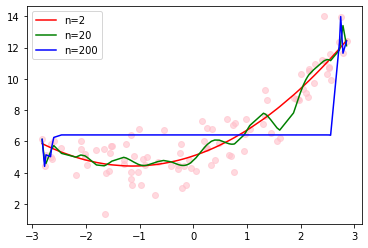

In [4]:
color = ['r', 'g', 'b']
plt.scatter(x = X, y = y+noise, alpha=0.6, color = 'pink')




for i in range(3):
    
    degree = 2 * 10**(i)
    transformer = PolynomialFeatures(degree = degree, include_bias=False) # 資料轉換器 轉換後會自動添加冪次特徵
    train_x = transformer.fit_transform(X.reshape(-1, 1))
    train_y = y+noise
    
    
    net = LinearRegression()
    net.fit(train_x, train_y)
    yhat = net.predict(train_x)

    
    plt.plot(X, yhat.reshape(-1), label = 'n=%d' %(degree), color = color[i])




plt.legend()
plt.show()

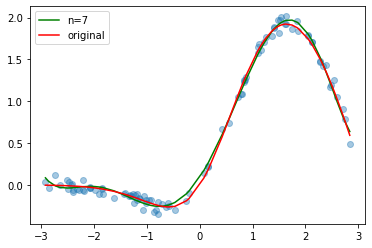

In [5]:
# 最後試一個複雜的例子
# 在區域線段內以多項式函數逼近三角函數， 也就是泰勒展開式


X = np.random.rand(100)*6-3
X = np.sort(X)
y = np.sin(X) + np.tanh(X)*np.sin(X)
noise =  np.random.randn(100) * y.mean()*0.1




degree = 7
transformer = PolynomialFeatures(degree = degree, include_bias=False) # 資料轉換器 轉換後會自動添加冪次特徵
train_x = transformer.fit_transform(X.reshape(-1, 1))
train_y = y+noise
    
    
net = LinearRegression()
net.fit(train_x, train_y)
yhat = net.predict(train_x)

    




plt.scatter(x = X, y = y+noise, alpha=0.4)
plt.plot(X, yhat.reshape(-1), label = 'n=%d' %(degree), color = 'g')
plt.plot(X, y, label = 'original', color = 'r')





plt.legend()
plt.show()